In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

# Example dataset (AND logic gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND operation

# Initialize and train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=10)
perceptron.fit(X, y)

# Predictions
predictions = perceptron.predict(X)
print("Predictions:", predictions)

Predictions: [0 0 0 1]


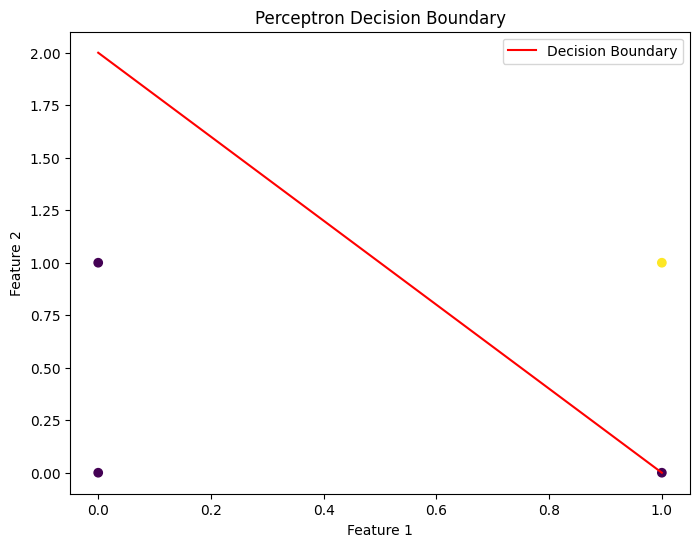

In [2]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
    x1 = np.linspace(0, 1, 100)
    x2 = -(model.weights[0] * x1 + model.bias) / model.weights[1]

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
    plt.plot(x1, x2, color='red', label='Decision Boundary')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, perceptron)

In [3]:
import numpy as np

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Multi-Layer Perceptron Class
class MLP:
    def __init__(self, learning_rate=0.1, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Initialize weights randomly for input -> hidden and hidden -> output
        np.random.seed(1)
        self.weights_input_hidden = np.random.rand(X.shape[1], 2)  # 2 neurons in hidden layer
        self.bias_hidden = np.random.rand(1, 2)

        self.weights_hidden_output = np.random.rand(2, 1)  # 1 neuron in output layer
        self.bias_output = np.random.rand(1, 1)

        # Training loop
        for _ in range(self.n_iterations):
            # Forward Pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            output_layer_output = sigmoid(output_layer_input)

            # Backward Pass (Gradient Descent)
            # Output layer error
            error_output = y - output_layer_output
            delta_output = error_output * sigmoid_derivative(output_layer_output)

            # Hidden layer error
            error_hidden = delta_output.dot(self.weights_hidden_output.T)
            delta_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

            # Update weights and biases
            self.weights_hidden_output += hidden_layer_output.T.dot(delta_output) * self.learning_rate
            self.bias_output += np.sum(delta_output, axis=0, keepdims=True) * self.learning_rate

            self.weights_input_hidden += X.T.dot(delta_hidden) * self.learning_rate
            self.bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        output_layer_output = sigmoid(output_layer_input)
        return (output_layer_output > 0.5).astype(int)  # Threshold at 0.5

# XOR Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR output

# Initialize and train MLP
mlp = MLP(learning_rate=0.1, n_iterations=10000)
mlp.fit(X, y)

# Predictions
predictions = mlp.predict(X)
print("Predictions for XOR:")
print(predictions)

Predictions for XOR:
[[0]
 [1]
 [1]
 [0]]


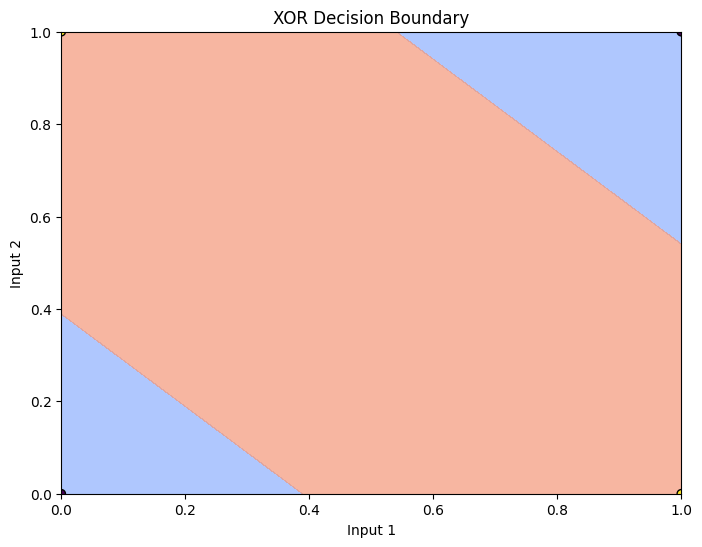

In [4]:
import matplotlib.pyplot as plt

def plot_xor_decision_boundary(X, y, model):
    x1_vals = np.linspace(0, 1, 100)
    x2_vals = np.linspace(0, 1, 100)
    x1, x2 = np.meshgrid(x1_vals, x2_vals)
    grid = np.c_[x1.ravel(), x2.ravel()]
    predictions = model.predict(grid).reshape(x1.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(x1, x2, predictions, levels=1, cmap="coolwarm", alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="viridis", edgecolor="k")
    plt.title("XOR Decision Boundary")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_xor_decision_boundary(X, y, mlp)